In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('telecom_churn_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
KS           4616 non-null object
 128         4616 non-null int64
 415         4616 non-null int64
 382-4657    4616 non-null object
 no          4616 non-null object
 yes         4616 non-null object
 25          4616 non-null int64
 265.1       4616 non-null float64
 110         4616 non-null int64
 45.07       4616 non-null float64
 197.4       4616 non-null float64
 99          4616 non-null int64
 16.78       4616 non-null float64
 244.7       4616 non-null float64
 91          4616 non-null int64
 11.01       4616 non-null float64
 10          4616 non-null float64
 3           4616 non-null int64
 2.7         4616 non-null float64
 1           4616 non-null int64
 False.      4616 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 757.4+ KB


,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [3]:
df.columns=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null object
VMail Plan              4616 non-null object
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null

In [5]:
df.drop(['Account Length','Phone'],axis=1,inplace=True)

In [6]:
df['VMail Message'].unique()

array([26,  0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6], dtype=int64)

In [7]:
df.head()

,State,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [8]:
x=df.drop(['State','Area Code','International Plan','VMail Plan','Churn'],axis=1)

In [9]:
x.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
x=pd.DataFrame(x,columns=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge','CustServ Calls'])

In [12]:
x.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
0,1.335823,-0.348881,1.154171,-0.349162,-0.097509,0.142270,-0.096981,1.064230,0.153198,1.065050,1.240552,-0.583572,1.241325,-0.433941
1,-0.577351,1.166800,0.701511,1.166964,-1.567138,0.495425,-1.567661,-0.752172,0.203362,-0.750893,0.696553,0.230255,0.690555,-1.199057
2,-0.577351,2.204429,-1.461196,2.204600,-2.740072,-0.614492,-2.740482,-0.073495,-0.549098,-0.073761,-1.334377,1.044083,-1.337891,0.331174
3,-0.577351,-0.254383,0.651216,-0.254336,-1.031109,1.100834,-1.030118,-0.271360,1.056150,-0.271624,-0.065046,-0.583572,-0.061716,1.096290
4,-0.577351,0.796218,-0.103217,0.796379,0.398961,0.041368,0.398676,0.065011,0.905658,0.066941,-1.443176,0.637169,-1.445359,-1.199057


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_mod = ['State','Area Code','International Plan','VMail Plan']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [14]:
for i in var_mod:
    x[i]=df[i]

In [15]:
x.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,State,Area Code,International Plan,VMail Plan
0,1.335823,-0.348881,1.154171,-0.349162,-0.097509,0.142270,-0.096981,1.064230,0.153198,1.065050,1.240552,-0.583572,1.241325,-0.433941,35,1,0,1
1,-0.577351,1.166800,0.701511,1.166964,-1.567138,0.495425,-1.567661,-0.752172,0.203362,-0.750893,0.696553,0.230255,0.690555,-1.199057,31,1,0,0
2,-0.577351,2.204429,-1.461196,2.204600,-2.740072,-0.614492,-2.740482,-0.073495,-0.549098,-0.073761,-1.334377,1.044083,-1.337891,0.331174,35,0,1,0
3,-0.577351,-0.254383,0.651216,-0.254336,-1.031109,1.100834,-1.030118,-0.271360,1.056150,-0.271624,-0.065046,-0.583572,-0.061716,1.096290,36,1,1,0
4,-0.577351,0.796218,-0.103217,0.796379,0.398961,0.041368,0.398676,0.065011,0.905658,0.066941,-1.443176,0.637169,-1.445359,-1.199057,1,2,1,0


In [16]:
y=df['Churn']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(3)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
predictions=knn.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
print(confusion_matrix(y_test,predictions))

[[770  12]
 [110  32]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       782
       True.       0.73      0.23      0.34       142

   micro avg       0.87      0.87      0.87       924
   macro avg       0.80      0.61      0.64       924
weighted avg       0.85      0.87      0.84       924



In [42]:
print(accuracy_score(y_test,predictions))

0.8679653679653679


In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

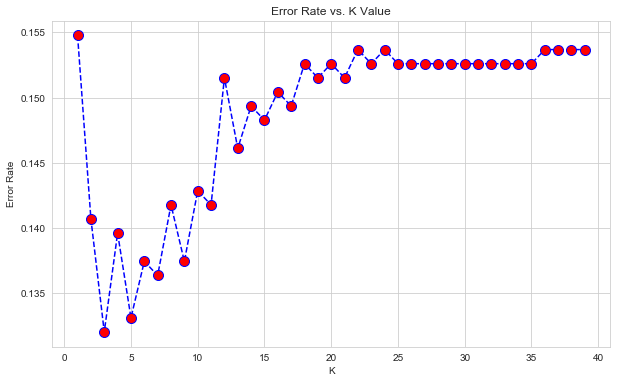

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')